<h1>데이터 시각화 기말고사</h1>

<h5>

학번 : 2018210059  
이름 : 송주호  
생년월일 : 1999/04/10
</h5>

빅카인즈에서 2022년 4월 10일에 해당하는 "경제" 키워드를 가진 기사로 대전일보에서 제공하는 "외식물가 꾸준히 오름세… 서민부담 가중" 기사를 이용하였습니다.

In [4]:
# 필요한 패키지 설치
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np
import urllib.request
import re
import matplotlib.font_manager as fm

In [5]:
# fname 옵션을 사용하는 방법
path = 'C:\\WINDOWS\\Fonts\\NanumBarunpenR.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunpen


In [6]:
# 데이터 불러오기
import urllib.parse
import urllib.request

url = "https://raw.githubusercontent.com/SongJuHo-0410/data_visualization/master/외식물가꾸준히오름서민부담가중.txt"  # 열고자 하는 URL

encoded_url = urllib.parse.quote(url, safe=':/')  # URL을 인코딩

with urllib.request.urlopen(encoded_url) as response:
    data = response.read()  # URL에서 읽은 데이터를 변수에 저장
    text = data.decode('utf-8')  # 데이터를 UTF-8로 디코딩
    print(text)  # 디코딩된 텍스트 출력 또는 다른 작업 수행

외식물가 꾸준히 오름세… 서민부담 가중

우크라 사태로 급등한 원재료값 그대로 외식물가 전이

주요 외식물가가 연일 널뛰면서 서민가계 부담이 커지고 있다. 우크라이나 사태로 급등한 원재료 값이 국내 외식물가에 그대로 전이된 영향이다. 러시아와 우크라이나 간 전쟁이 장기화되면서 전방위적인 물가 상승세는 당분간 이어질 가능성이 크다.
10일 한국소비자원 참가격에 따르면 지난달 기준 대전지역 김밥 1인분의 평균 가격은 2600원으로 1년 전(2400원)보다 8.3% 올랐다. 자장면 1인분의 가격은 5400원에서 5800원으로 1년 새 7.4% 상승했다. 삼겹살 1인분도 1년 전(1만 5933원)과 견줘 7.4% 오른 1만 7117원으로 집계됐다.
이어 칼국수(6.7%), 냉면(6.0%), 비빔밥(5.7%), 삼계탕(4.8%), 김치찌개 백반(3.1%) 등 다른 외식 품목도 1년 전보다 가격이 줄줄이 오른 상태다. 특히 냉면은 8800원으로 9000원대에, 비빔밥은 9200원으로 1만 원대에 성큼 다가섰다.
외식 프랜차이즈 업계 또한 가격 인상이 이어지고 있다. 한국농수산식품유통공사(aT)의 주요 외식 프랜차이즈 가격 동향에 따르면 지난달 다섯째 주 기준 분식 프랜차이즈 전문점 감탄떡볶이의 '감탄떡볶이'는 3500원으로, 정부가 처음 공시했던 2월 셋째 주 가격(3000원)과 비교해 16.7% 뛰었다.
같은 기간 죽 프랜차이즈 죽이야기의 '불낙죽 순한맛'은 1만 원에서 1만 1500원으로, 치킨 프랜차이즈 멕시카나의 '까르보불닭치킨'은 1만 8000원에서 1만 9840원으로 각각 15%, 10.2%씩 상승했다. 이외에도 미스터피자 '불고기피자(L)'(8.4%)와 네네치킨 '후라이드치킨'(6.7%)을 비롯해 13개 브랜드 30여 개 품목이 적게는 0.3%에서 많게는 6.3% 수준으로 가격 인상을 마쳤다.
이 같은 외식물가 오름세는 공급망 차질과 원자재 값 상승 등의 영향이 크다. 우크라이나 사태 장기화에 따른 물가 상승 압력 지속, 사회적 거리두기 완화에 따른 국내 소

In [7]:
# 명사만 추출하여 확인
# 명사 추출
nouns = re.findall(r'\b\w+[가-힣]+\b', text)
print(nouns)


['외식물가', '꾸준히', '오름세', '서민부담', '가중', '우크라', '사태로', '급등한', '원재료값', '그대로', '외식물가', '전이', '주요', '외식물가가', '연일', '널뛰면서', '서민가계', '부담이', '커지고', '있다', '우크라이나', '사태로', '급등한', '원재료', '값이', '국내', '외식물가에', '그대로', '전이된', '영향이다', '러시아와', '우크라이나', '전쟁이', '장기화되면서', '전방위적인', '물가', '상승세는', '당분간', '이어질', '가능성이', '크다', '10일', '한국소비자원', '참가격에', '따르면', '지난달', '기준', '대전지역', '김밥', '1인분의', '평균', '가격은', '2600원으로', '1년', '2400원', '보다', '올랐다', '자장면', '1인분의', '가격은', '5400원에서', '5800원으로', '1년', '상승했다', '삼겹살', '1인분도', '1년', '1만', '5933원', '견줘', '오른', '1만', '7117원으로', '집계됐다', '이어', '칼국수', '냉면', '비빔밥', '삼계탕', '김치찌개', '백반', '다른', '외식', '품목도', '1년', '전보다', '가격이', '줄줄이', '오른', '상태다', '특히', '냉면은', '8800원으로', '9000원대에', '비빔밥은', '9200원으로', '1만', '원대에', '성큼', '다가섰다', '외식', '프랜차이즈', '업계', '또한', '가격', '인상이', '이어지고', '있다', '한국농수산식품유통공사', '주요', '외식', '프랜차이즈', '가격', '동향에', '따르면', '지난달', '다섯째', '기준', '분식', '프랜차이즈', '전문점', '감탄떡볶이의', '감탄떡볶이', '3500원으로', '정부가', '처음', '공시했던', '2월', '셋째', '가격', '3000원', '비교해', '뛰었다', '같은', '기간', '프랜차이

In [8]:
# 단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1] 

# 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터 생성
c = Counter(words) 

In [9]:
# 딕셔너리 데이터 확인 (상위 20개)

from collections import Counter

most_common_items = c.most_common(20)  # 가장 빈도가 높은 20개 항목

for item, count in most_common_items:
    print(f"{item}: {count}")

1만: 7
프랜차이즈: 5
있다: 4
물가: 4
1년: 4
가격: 4
외식물가: 3
우크라이나: 3
외식: 3
사태로: 2
급등한: 2
그대로: 2
주요: 2
국내: 2
상승세는: 2
당분간: 2
이어질: 2
가능성이: 2
크다: 2
따르면: 2


많이 나오는 단어로 1만, 프랜차이즈, 있다, 물가, 가격 등을 통해 외식과 관련된 가격이 상승하고 물라가 증가하고 있다는 것을 파악할 수 있습니다. 또한 상위 20개를 파악하였을 때 우크라이나가 나오는데 당시 전쟁으로 인해 많은 영향을 미쳤습니다.

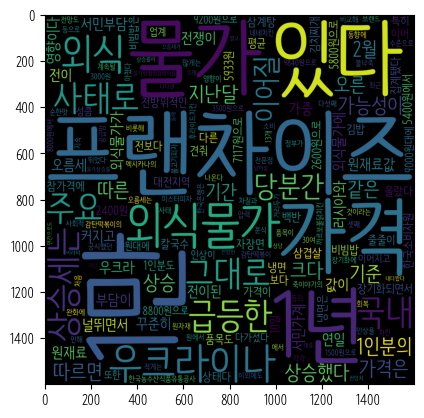

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(font_path= path, width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)



결론 : 외식물가가 꾸준히 오름세를 보이면서 서민가계의 부담이 가중되고 있습니다. 이는 우크라이나 사태로 인해 급등한 원재료값이 외식물가에 그대로 전이되는 영향입니다. 다양한 외식 품목의 가격이 상승하고, 외식 프랜차이즈 업계도 가격 인상을 이어가고 있습니다. 이러한 물가 상승은 공급망 차질과 원자재 값 상승 등의 요인에 기인하며, 우크라이나 사태의 장기화와 소비 회복에 따른 물가 상승이 지속될 전망입니다. 한국은행은 물가 상승률이 상당 기간 동안 4%대로 나타날 것으로 예상하며, 올해의 물가 상승률은 예상치인 3.1%를 크게 넘어설 가능성도 있다고 전망하고 있습니다.